array([ 9.28824388e-06,  1.33616885e-05,  8.89806378e-06,  0.00000000e+00,
       -3.90000000e+01,  8.59551000e-01])
soma { nseg=1  L=18.9137  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=18.9137}
	insert capacitance { cm=0.859551}
}
soma { nseg=1  L=18.9137  Ra=100
	/*location 0 attached to cell 0*/
	/* First segment only */
	insert morphology { diam=18.9137}
	insert capacitance { cm=0.859551}
	insert irk { gbar_irk=8.89806e-06}
	insert k_ion { ek=-80}
	insert leak { gbar_leak=1.33617e-05 e_leak=-39}
	insert egl19 { gbar_egl19=9.28824e-06}
	insert ca_ion { eca=60}
	insert nca { gbar_nca=0 e_nca=30}
	insert IClamp { del=1000 dur=5000 amp=10}
}
1


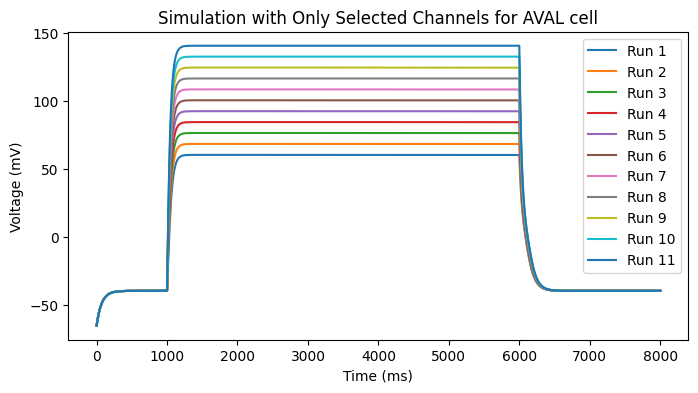

In [1]:
import sys
sys.path.append('..')  # the parent directory
from AVAL_simulation_iclamp import AVA_simulation_iclamp
from g_to_Scm2 import gScm2
import pprint

surf=1123.84e-8 # surface in cm^2 form neuromorpho AVAL

  
# coductances: egl19, leak, irk, nca, eleak, cm
g0=[0.104385,0.150164,0.1,0,-39,0.859551]
!!!
# # leak 
# g0=[0.0, 0.150164, 0 ,0 ,-39, 0.859551]
# # irk + leak 
# g0=[0.0, 0.150164, 0.1 ,0 ,-39, 0.859551]

# # leak + egl19
# g0 = [0.104385, 0.150164, 0 ,0 ,-39, 0.859551]




gAVAL_scaled = gScm2(g0,surf,3)

pprint.pprint(gAVAL_scaled)

        


v, time1, vi_peak, vi = AVA_simulation_iclamp(gAVAL_scaled, s1=0.015, s2=0.035, ns=11)
#s2 = 0.035
# best_cc=AVAL_simulation_iclamp(gbest,-0.015,0.035,11)
# best_voltage=best_cc[0]
# best_time2=best_cc[1]
# best_VIss=best_cc[3]
# best_VIpeaks=best_cc[2]



# #Matplotlib


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))

from neuron import h
print(h("forall psection()"))


for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'Run {i + 1}', linewidth=1.5)


plt.title('Simulation with Only Selected Channels for AVAL cell')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')


plt.legend()
plt.show()

## NeuroML

In [2]:
import pandas as pd
from pyneuroml import pynml

def run_simulation_and_get_results(lems_file):
    # Run the simulation with pyNeuroML
    print(f"Running simulation: {lems_file}")
    results = pynml.run_lems_with_jneuroml(
        lems_file, 
        max_memory="1024M", 
        nogui=True, 
        plot=False, 
        load_saved_data=True
    )

    # time and variable values
    time = results["t"]
    voltage_data = {}
    for key in results:
        if key.startswith("pop_AVAL") and key.endswith("/v"):  # Filter voltage keys
            compartment = key.split("/")[1]  # Extract compartment index
            voltage_data[f"Run {compartment}"] = results[key]
    
    
    df = pd.DataFrame(voltage_data)
    df.insert(0, "Time (ms)", time)  # Add time as the first column
    return df


lems_file = "LEMS_Sim_IClamp_AVAL.xml" 
df_AVAL_NML = run_simulation_and_get_results(lems_file)
df_AVAL_NML = df_AVAL_NML * 1000 # Convert voltage from V to mV and time from s to ms
nml_time = df_AVAL_NML.iloc[:, 0]
nml_voltages = df_AVAL_NML.iloc[:, 1:4]

pyNeuroML >>> 15:51:27 - INFO - Loading LEMS file: LEMS_Sim_IClamp_AVAL.xml and running with jNeuroML
pyNeuroML >>> 15:51:27 - INFO - Executing: (java -Xmx1024M  -Djava.awt.headless=true -jar  "/opt/homebrew/anaconda3/envs/py39n/lib/python3.9/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.13.3-jar-with-dependencies.jar"  LEMS_Sim_IClamp_AVAL.xml  -nogui -I '') in directory: .


Running simulation: LEMS_Sim_IClamp_AVAL.xml


pyNeuroML >>> 15:52:11 - INFO - Command completed successfully!


In [3]:
nml_voltages = df_AVAL_NML.iloc[:, 1:]

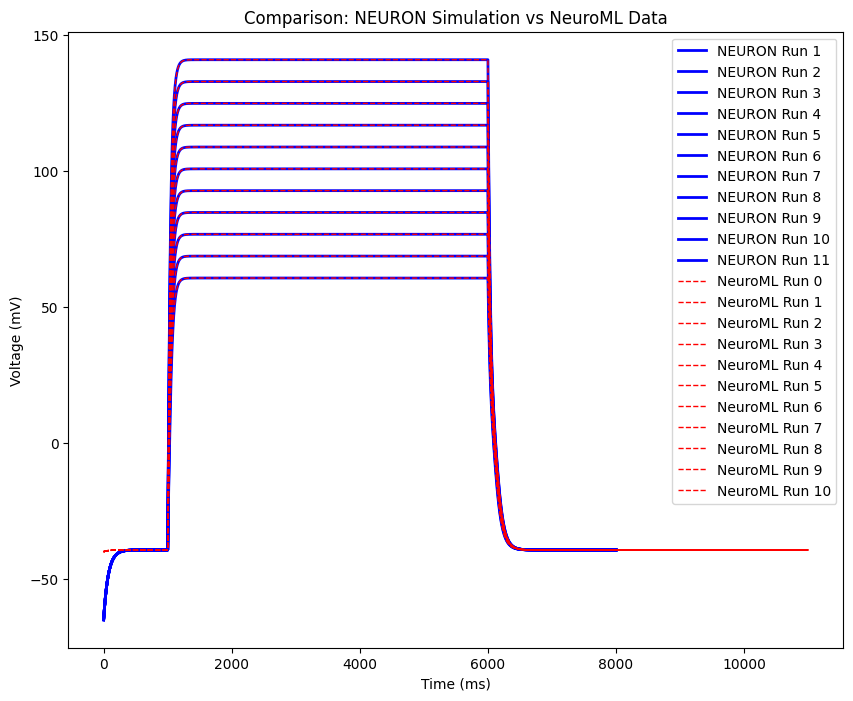

In [4]:
#matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

# NEURON simulation data
for i in range(len(v)):
    plt.plot(time1[i], v[i], label=f'NEURON Run {i + 1}', linewidth=2, color='blue')

# NeuroML data
for col in nml_voltages.columns:
    plt.plot(nml_time, df_AVAL_NML[col], label=f'NeuroML {col}', linewidth=1, color='red', linestyle='--')


plt.title('Comparison: NEURON Simulation vs NeuroML Data')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (mV)')

plt.legend(loc='upper right')

plt.show()


In [5]:
# # PLOTLY
# import plotly.graph_objects as go

# # # Create the Plotly figure
# fig = go.Figure()

# # Add NEURON simulation data to the plot
# fig = go.Figure()

# for i in range(len(v)):
#     fig.add_trace(
#         go.Scatter(
#             x=time1[i], 
#             y=v[i], 
#             mode='lines', 
#             name=f'NEURON Run {i + 1}', # Label each run
#             line = dict(color = 'blue', width = 2)
#         )
#     )



# # Add NeuroML data to the plot
# for col in nml_voltages.columns:
#     fig.add_trace(
#         go.Scatter(
#             x=nml_time,  # Time from NeuroML data
#             y=df_AVAL_NML[col],  # Voltage from NeuroML data
#             mode='lines',
#             name=f'NeuroML {col}',  # Label for each trace
#             line=dict(color='red', dash='dash', width=1)
#         )
#     )


# fig.update_layout(
#     title='Comparison: NEURON Simulation vs NeuroML Data',
#     xaxis_title='Time (ms)',
#     yaxis_title='Voltage (mV)',
#     template='plotly_white',
#     legend=dict(x=0.99, y=0.99),  # adjust legend position
#     height=700,  
#     width=800   
# )


# fig.show()

In [6]:
#!pynml LEMS_Sim_IClamp_AVAL.xml